In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
row_data = fetch_california_housing()

In [3]:
housing = pd.DataFrame(row_data.data, columns=row_data.feature_names)

In [4]:
housing['Price'] = row_data.target

## Data

In [5]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
housing.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
print(row_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [9]:
housing.loc[:,['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Price']].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,5.000010


In [11]:
#checking for null values
housing.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

## EDA

In [12]:
housing.loc[:,['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Price']].corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,-0.023737
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,1.000000


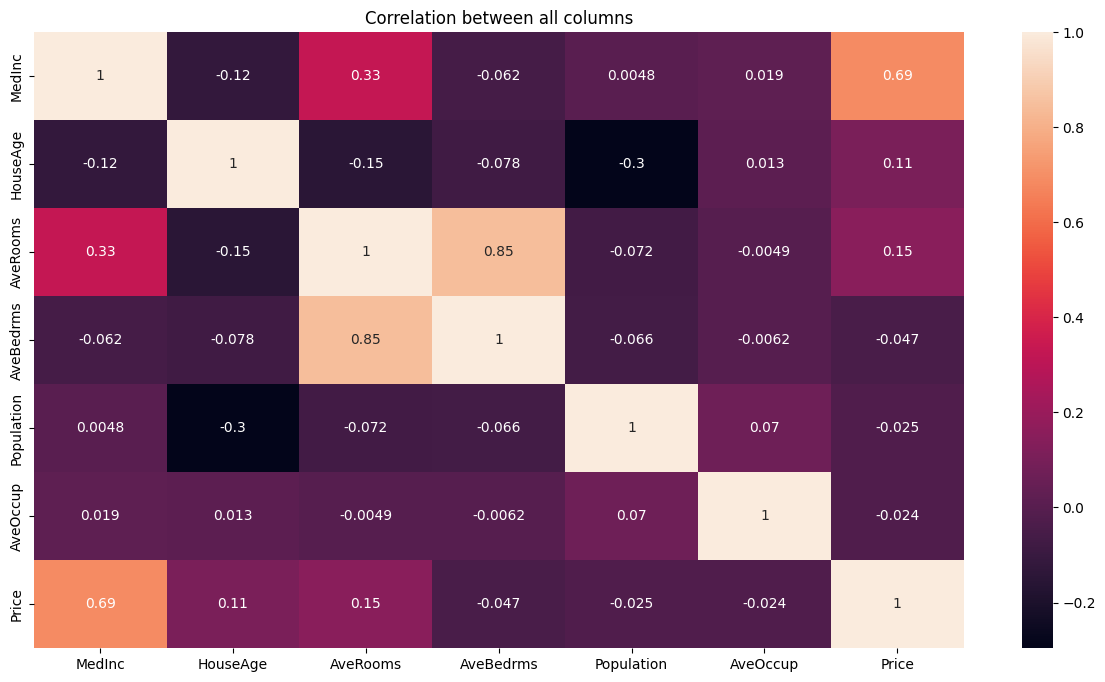

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(housing.loc[:,['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Price']].corr(), annot=True)
plt.title('Correlation between all columns')
plt.show()

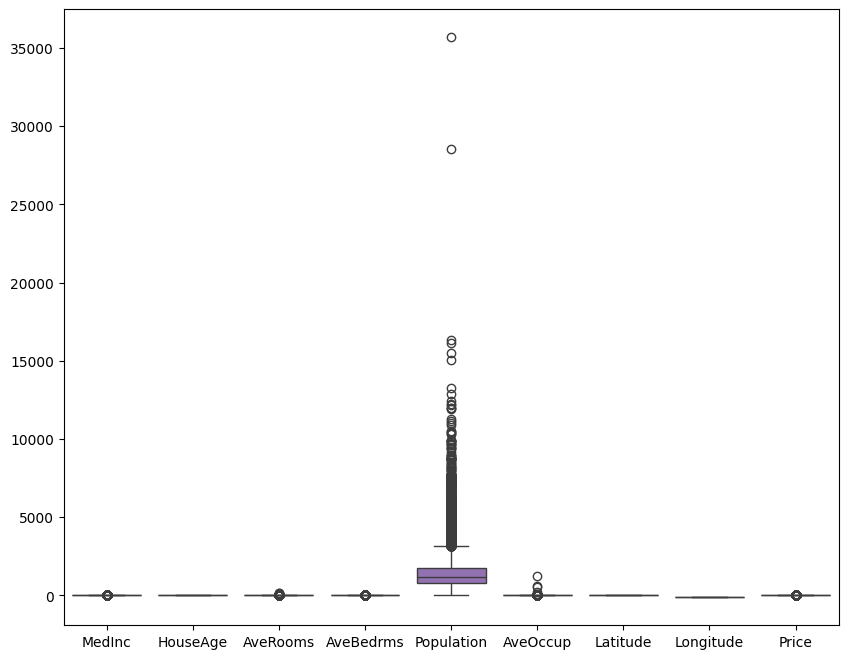

In [17]:
# Detecting the outliers in given data set
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data= housing, ax=ax)
plt.show()

In [18]:
housing_no = housing.copy()

In [19]:
# Drop unnecessary columns
housing_no.drop(columns=['AveBedrms', 'Latitude', 'Longitude'], inplace=True)

In [20]:
# Droping The Outliers from MedInc column
IQR = housing.MedInc.quantile(0.75) - housing.MedInc.quantile(0.25)
MedInc_lower = housing.MedInc.quantile(0.25) - 1.5*IQR
MedInc_upper = housing.MedInc.quantile(0.75) + 1.5*IQR
housing_no['MedInc'] = housing_no.loc[(housing_no.MedInc > MedInc_lower) & (housing_no.MedInc < MedInc_upper), 'MedInc']

In [21]:
# Droping The Outliers from HouseAge column
IQR = housing.HouseAge.quantile(0.75) - housing.HouseAge.quantile(0.25)
HouseAge_lower = housing.HouseAge.quantile(0.25) - 1.5*IQR
HouseAge_upper = housing.HouseAge.quantile(0.75) + 1.5*IQR
housing_no['HouseAge'] = housing_no.loc[(housing_no.HouseAge > HouseAge_lower) & (housing_no.HouseAge < HouseAge_upper), 'HouseAge']

In [22]:
# Droping The Outliers from AveRooms column
IQR = housing.AveRooms.quantile(0.75) - housing.AveRooms.quantile(0.25)
AveRooms_lower = housing.AveRooms.quantile(0.25) - 1.5*IQR
AveRooms_upper = housing.AveRooms.quantile(0.75) + 1.5*IQR
housing_no['AveRooms'] = housing_no.loc[(housing_no.AveRooms > AveRooms_lower) & (housing_no.AveRooms < AveRooms_upper), 'AveRooms']

In [23]:
# Droping The Outliers from Population column
IQR = housing.Population.quantile(0.75) - housing.Population.quantile(0.25)
Population_lower = housing.Population.quantile(0.25) - 1.5*IQR
Population_upper = housing.Population.quantile(0.75) + 1.5*IQR
housing_no['Population'] = housing_no.loc[(housing_no.Population > Population_lower) & (housing_no.Population < Population_upper), 'Population']

In [24]:
# Droping The Outliers from AveOccup column
IQR = housing.AveOccup.quantile(0.75) - housing.AveOccup.quantile(0.25)
AveOccup_lower = housing.AveOccup.quantile(0.25) - 1.5*IQR
AveOccup_upper = housing.AveOccup.quantile(0.75) + 1.5*IQR
housing_no['AveOccup'] = housing_no.loc[(housing_no.AveOccup > AveOccup_lower) & (housing_no.AveOccup < AveOccup_upper), 'AveOccup']

In [25]:
housing_no.dropna(inplace=True)
housing_no.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
Population    0
AveOccup      0
Price         0
dtype: int64

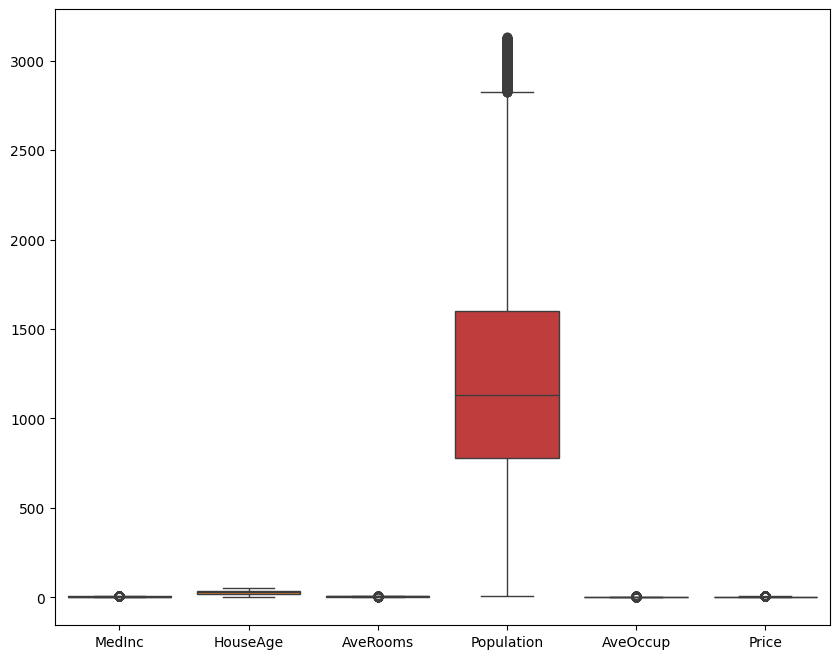

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data= housing_no, ax=ax)
plt.show()